In [20]:
# import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from utils import *
import cv2
from skimage.morphology import label
import pandas as pd

In [22]:
dataFold = '../data/'
output_fold = '../output/best/'

val = np.load(dataFold + 'val.npy').item()
test = np.load(dataFold + 'test.npy').item() 

val_pred = np.load(output_fold + 'pred_val.npy')
test_pred = np.load(output_fold + 'pred_test.npy')

'ea94ba4b01d1bd5f7768d10e0ac547743791033df545c71fcec442d0cb5cb5e7'

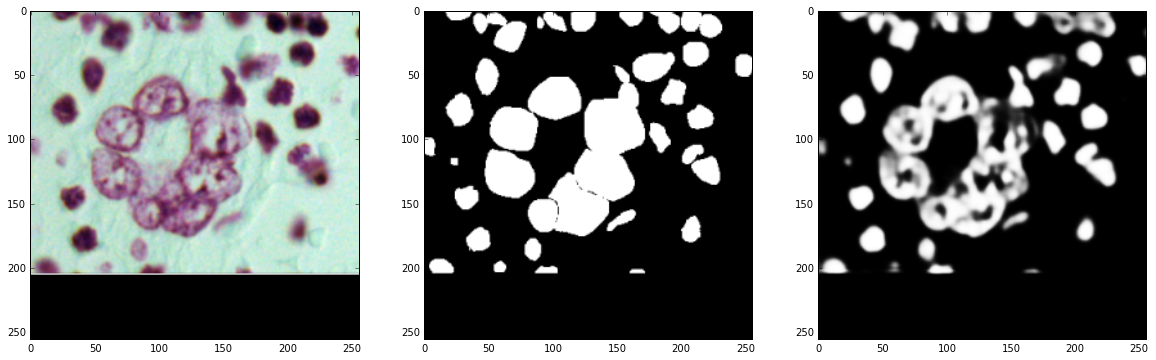

In [3]:
#Val images
ix = 11
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(val['imgs'][ix,:,:,:])
plt.subplot(132); plt.imshow(val['masks'][ix,:,:,0], cmap = 'gray')
plt.subplot(133); plt.imshow(val_pred[3][ix,:,:,0], cmap = 'gray')
val['ids'][ix]

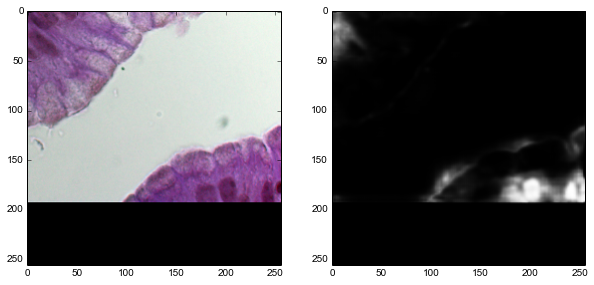

In [57]:
ix = 7
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(test['imgs'][ix,:,:,:])
plt.subplot(122); plt.imshow(test_pred[3][ix,:,:,0], cmap = 'gray')

(256, 256, 3)


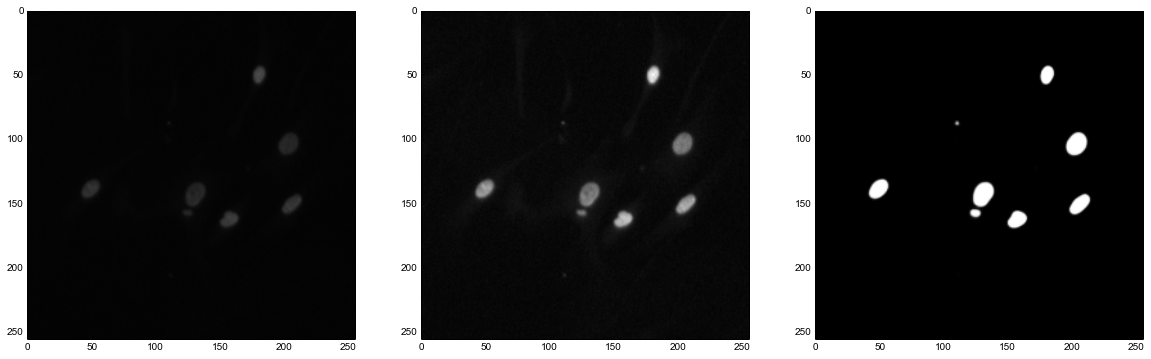

In [4]:
#Try resize
ix = 0
down_img_orig = test['imgs'][ix]; shape_orig = test['orig_shapes'][ix]
print(test['orig_shapes'][ix])
upsampled = resize_img_upample(down_img_orig,shape_orig)
upsampled_mask = resize_img_upample(test_pred[3][ix,:,:,:],shape_orig)
fname = dataFold + '/test_1_imgs/'  + test['ids'][ix] + '/images/' + test['ids'][ix] + '.png'
img_orig = cv2.imread(fname,1)


plt.figure(figsize=(20,10));
plt.subplot(131); plt.imshow(img_orig)
plt.subplot(132); plt.imshow(upsampled)
plt.subplot(133); plt.imshow(upsampled_mask[:,:,0],cmap = 'gray')

In [23]:
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)
        
new_test_ids = []
rles = []
for n, id_ in enumerate(test['ids']):
    pred_test_upsampled = resize_img_upample(test_pred[3][n,:,:,:],test['orig_shapes'][n])
    rle = list(prob_to_rles(pred_test_upsampled))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))
    


In [92]:
test_pred[3][n,:,:,:].shape
test['orig_shapes'][n]
n

0

In [24]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('../sub-2.csv', index=False)